In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DS/hepatitis_csv.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [ ]:
dataset.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [ ]:
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [ ]:
dataset = dataset[["age", 	"bilirubin" , 	"alk_phosphate" ,	"sgot" , 	"albumin" ,	"protime", "class"]]

In [ ]:
for index, i in zip(dataset.isna().any().index ,dataset.isna().any()):
  if i:
    med = dataset[index].median()
    dataset[index] = dataset[index].replace(np.nan, med)
  print(index, i)

age False
bilirubin True
alk_phosphate True
sgot True
albumin True
protime True
class False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
median_pt = dataset['protime'].median()
dataset['protime'].replace(np.nan,median_pt,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
dataset.head()



,age,bilirubin,alk_phosphate,sgot,albumin,protime,class
0,30,1.0,85.0,18.0,4.0,61.0,live
1,50,0.9,135.0,42.0,3.5,61.0,live
2,78,0.7,96.0,32.0,4.0,61.0,live
3,31,0.7,46.0,52.0,4.0,80.0,live
4,34,1.0,85.0,200.0,4.0,61.0,live


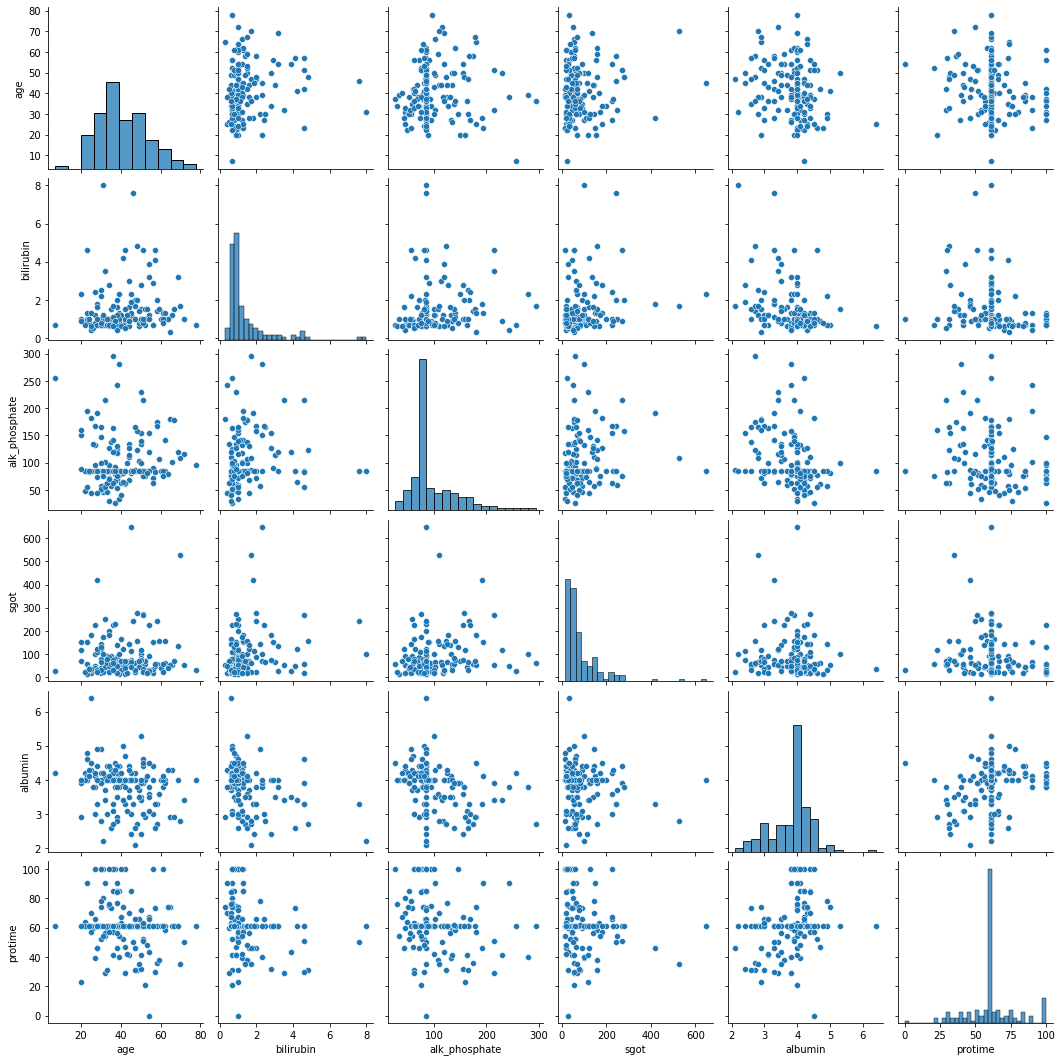

In [ ]:

sns.pairplot(dataset)


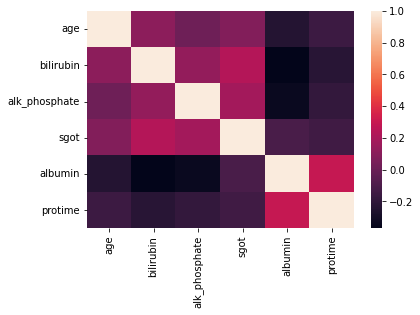

In [ ]:
sns.heatmap(dataset.corr())

In [ ]:
y = dataset["class"].values
del dataset["class"]


In [ ]:
X = dataset.values

In [ ]:
dataset=(dataset-dataset.min())/(dataset.max()-dataset.min())

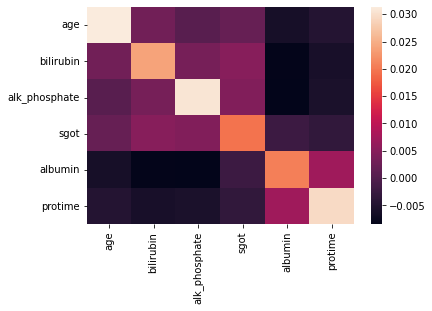

In [ ]:

sns.heatmap(dataset.cov())

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_r = pca.fit_transform(X_train)
X_test_r = pca.transform(X_test)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,  max_iter=10000)
clf = clf.fit(X_train_r, y_train)
pred = clf.predict(X_test_r)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Accuracy: %s' % metrics.accuracy_score(y_test, pred))


Mean Absolute Error: 0.22580645161290322
Accuracy: 0.7741935483870968


Conclusion: The rate of mortality was predicted using logistic regression,Pandas, numpy and sklearn. with a mean absolute error of 0.226 for test set, giving a validation accuracy of 77.4%.
 


